In [8]:
from matplotlib import pyplot as plt
import json
import numpy as np
import math

In [51]:
data = []
for fp in ["data/intervals_geomagnetic_rpy.json", "data/intervals_builtin_rpy.json", "data/intervals_ekf.json"]:
    with open(fp) as f:
        data.append(json.load(f))

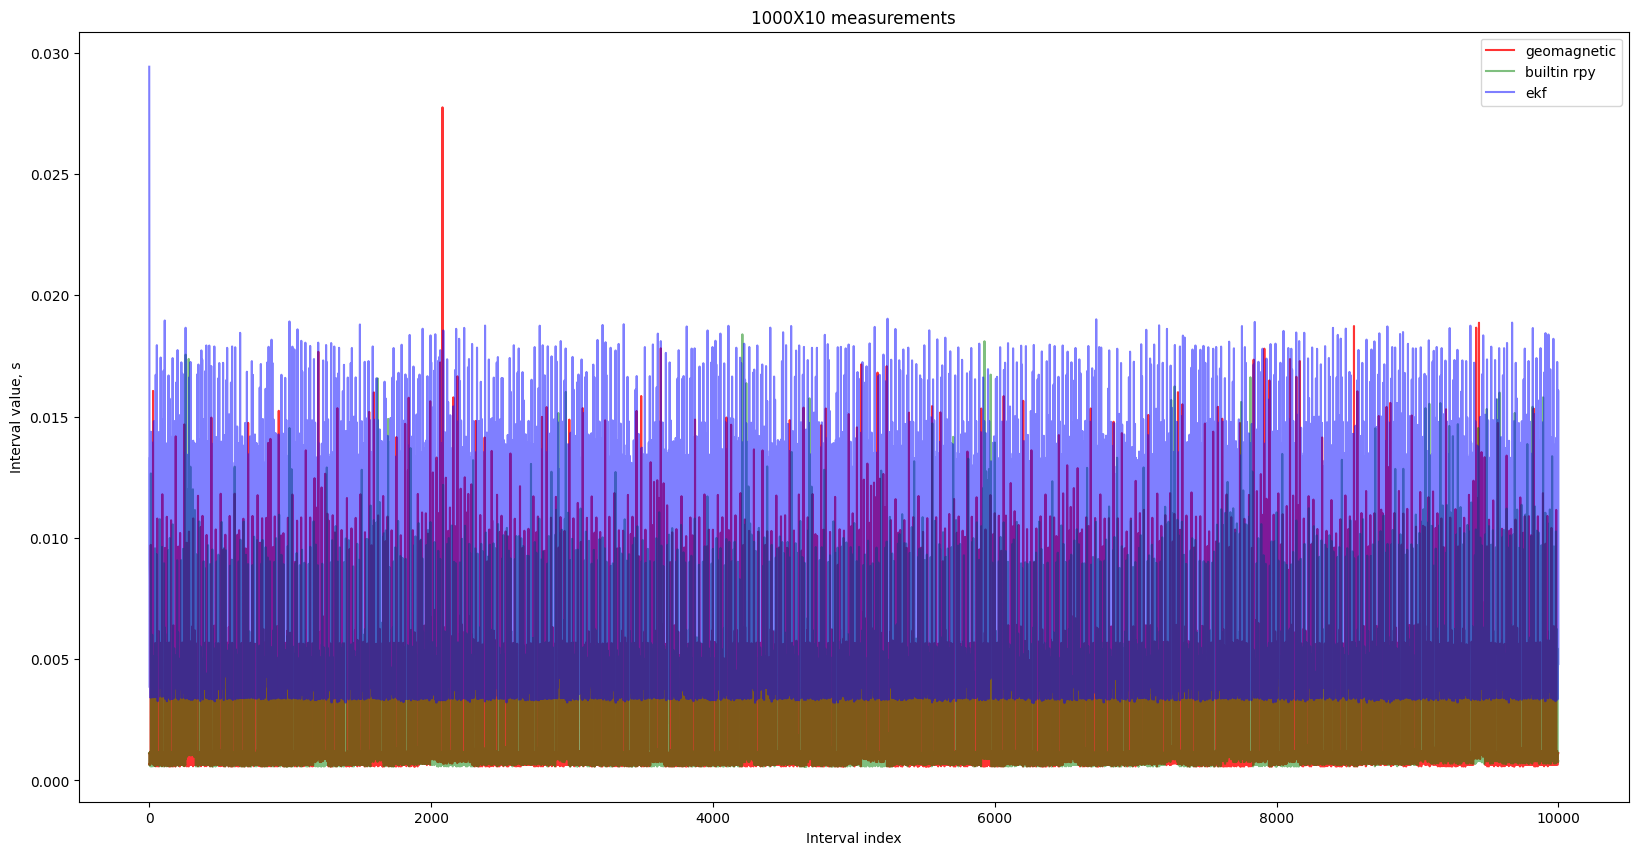

In [53]:
figure = plt.figure(figsize= (20, 10))
plt.title("1000X10 measurements")
plt.plot([i for i in range(len(data[0]))], data[0], alpha=0.8, color="red")
plt.plot([i for i in range(len(data[1]))], data[1], alpha=0.5, color="green")
plt.plot([i for i in range(len(data[2]))], data[2], alpha=0.5, color="blue")
plt.legend(["geomagnetic", "builtin rpy", "ekf"])
plt.xlabel("Interval index")
plt.ylabel("Interval value, s")
plt.show()

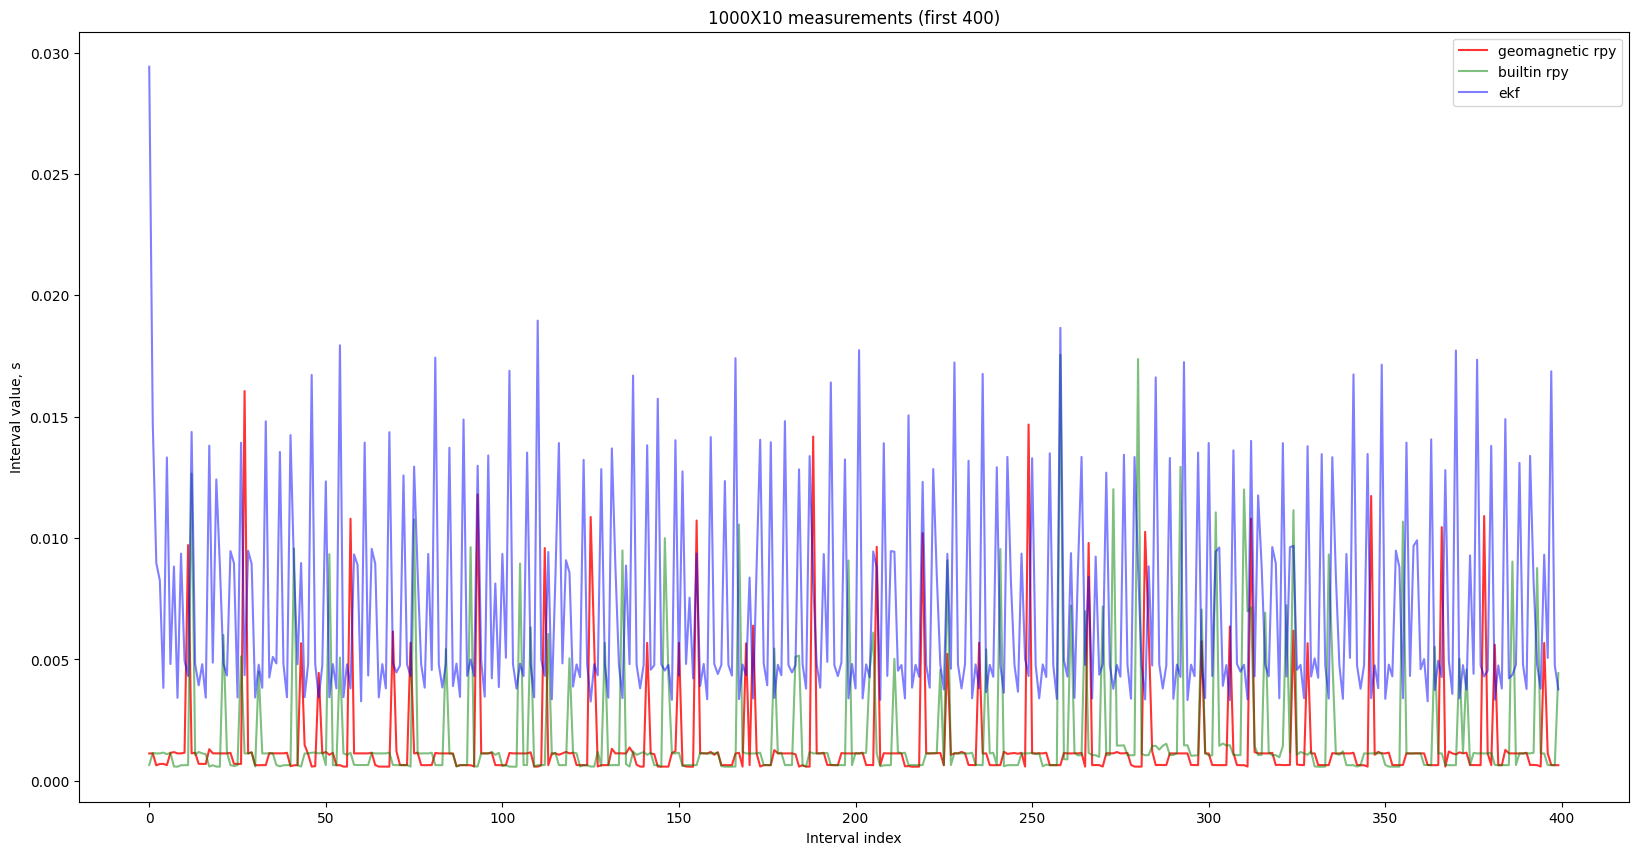

In [55]:
figure = plt.figure(figsize= (20, 10))
plt.title("1000X10 measurements (first 400)")
plt.plot([i for i in range(len(data[0][:400]))], data[0][:400], alpha=0.8, color="red")
plt.plot([i for i in range(len(data[1][:400]))], data[1][:400], alpha=0.5, color="green")
plt.plot([i for i in range(len(data[2][:400]))], data[2][:400], alpha=0.5, color="blue")
plt.legend(["geomagnetic rpy", "builtin rpy", "ekf"])
plt.xlabel("Interval index")
plt.ylabel("Interval value, s")
plt.show()

In [56]:
with open("./data/test1.json") as f:
    data = (json.load(f))
data

[{'GEOMAG': [2.9677734375, 0.4736328125, -0.416015625, 2.606689453125],
  'RPY': [0.0, 0.0, 0.0, 0.0],
  'EKF': [0.9761895728905361,
   0.06369623318616477,
   0.013506053193380739,
   0.20691615254692894]},
 {'GEOMAG': [3.094482421875, 0.559814453125, -0.315185546875, 2.451904296875],
  'RPY': [0.76849365234375,
   0.02813720703125,
   0.0101318359375,
   0.63909912109375],
  'EKF': [0.9529598637495617,
   0.055916745313762554,
   0.011207419020844052,
   0.29768306877419803]},
 {'GEOMAG': [3.094482421875, 0.559814453125, -0.315185546875, 2.451904296875],
  'RPY': [0.76849365234375,
   0.02813720703125,
   0.0101318359375,
   0.63909912109375],
  'EKF': [0.9347375423114902,
   0.050661972850679964,
   0.00933908759196401,
   0.35158480192309477]},
 {'GEOMAG': [3.094482421875, 0.559814453125, -0.315185546875, 2.451904296875],
  'RPY': [0.76849365234375,
   0.02813720703125,
   0.0101318359375,
   0.63909912109375],
  'EKF': [0.9201914368199499,
   0.04737290525067634,
   0.008186087704

In [84]:
mes_len = len(data)
scalar = {} # 3*len

In [85]:
for pare in [["GEOMAG", "EKF"], ["RPY", "GEOMAG"], ["EKF", "RPY"]]:
    pare_scalars = [] #len
    for i in range(mes_len):
        q = data[i][pare[0]]
        q_ = data[i][pare[1]]
        dot = np.dot(q/np.linalg.norm(q), q_/np.linalg.norm(q_))
        angle = math.degrees((2 * (math.acos(dot))))
        pare_scalars.append(angle)
    scalar.update({f"<{pare[0],pare[1]}>": pare_scalars})

/tmp/ipykernel_5327/4057971827.py:6: RuntimeWarning: invalid value encountered in divide
  dot = np.dot(q/np.linalg.norm(q), q_/np.linalg.norm(q_))


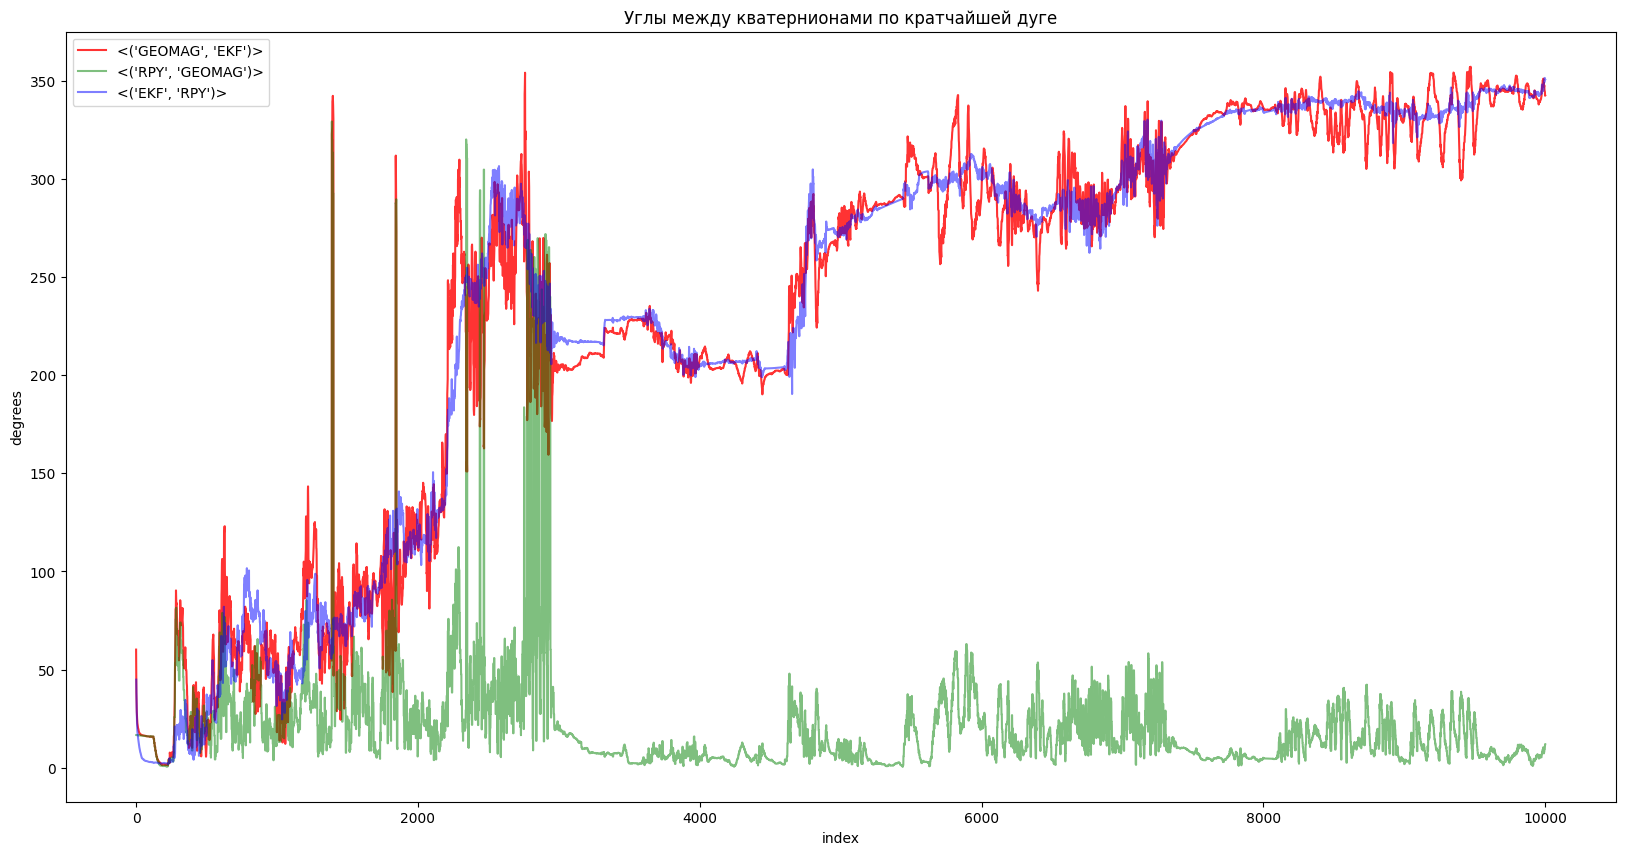

In [88]:
figure = plt.figure(figsize= (20, 10))
plt.title("Углы между кватернионами по кратчайшей дуге")
plt.plot([i for i in range(mes_len)], scalar["<('GEOMAG', 'EKF')>"], alpha=0.8, color="red")
plt.plot([i for i in range(mes_len)], scalar["<('RPY', 'GEOMAG')>"], alpha=0.5, color="green")
plt.plot([i for i in range(mes_len)], scalar["<('EKF', 'RPY')>"], alpha=0.5, color="blue")
plt.legend(["<('GEOMAG', 'EKF')>", "<('RPY', 'GEOMAG')>", "<('EKF', 'RPY')>"])
plt.xlabel("index")
plt.ylabel("degrees")
plt.show()
# dot = cos(1/2 angle)
# arcos(dot) = 1/2angle
# 2 * arccos(dot) = angle

In [116]:
with open("./data/test2.json") as f:
    data = (json.load(f))
mes_len = len(data)
angles = {}
def limit(angles):
    return [30 if a > 30 else -30 if a < -30 else a for a in angles]
for mes_type in ["GEOMAG", "RPY", "EKF"]:
    angles.update({mes_type: [[mes[mes_type][i] for i in range(3)] for mes in data]})
angles

{'GEOMAG': [[3.4374922021288223, -14.618079270255723, 98.66702972883475],
  [3.4374922021288223, -14.618079270255723, 98.66702972883475],
  [3.728312273259129, -14.700493705544806, 97.4331312940667],
  [3.728312273259129, -14.700493705544806, 97.4331312940667],
  [3.728312273259129, -14.700493705544806, 97.4331312940667],
  [3.7682562825641606, -14.618702554186061, 97.3152037217446],
  [3.7682562825641606, -14.618702554186061, 97.3152037217446],
  [3.7682562825641606, -14.618702554186061, 97.3152037217446],
  [3.7682562825641606, -14.618702554186061, 97.3152037217446],
  [3.886368336581802, -14.532063411042918, 96.85238505923067],
  [3.886368336581802, -14.532063411042918, 96.85238505923067],
  [3.886368336581802, -14.532063411042918, 96.85238505923067],
  [3.840318087654302, -14.723852772616901, 96.9731464335767],
  [3.840318087654302, -14.723852772616901, 96.9731464335767],
  [3.840318087654302, -14.723852772616901, 96.9731464335767],
  [3.840318087654302, -14.723852772616901, 96.973

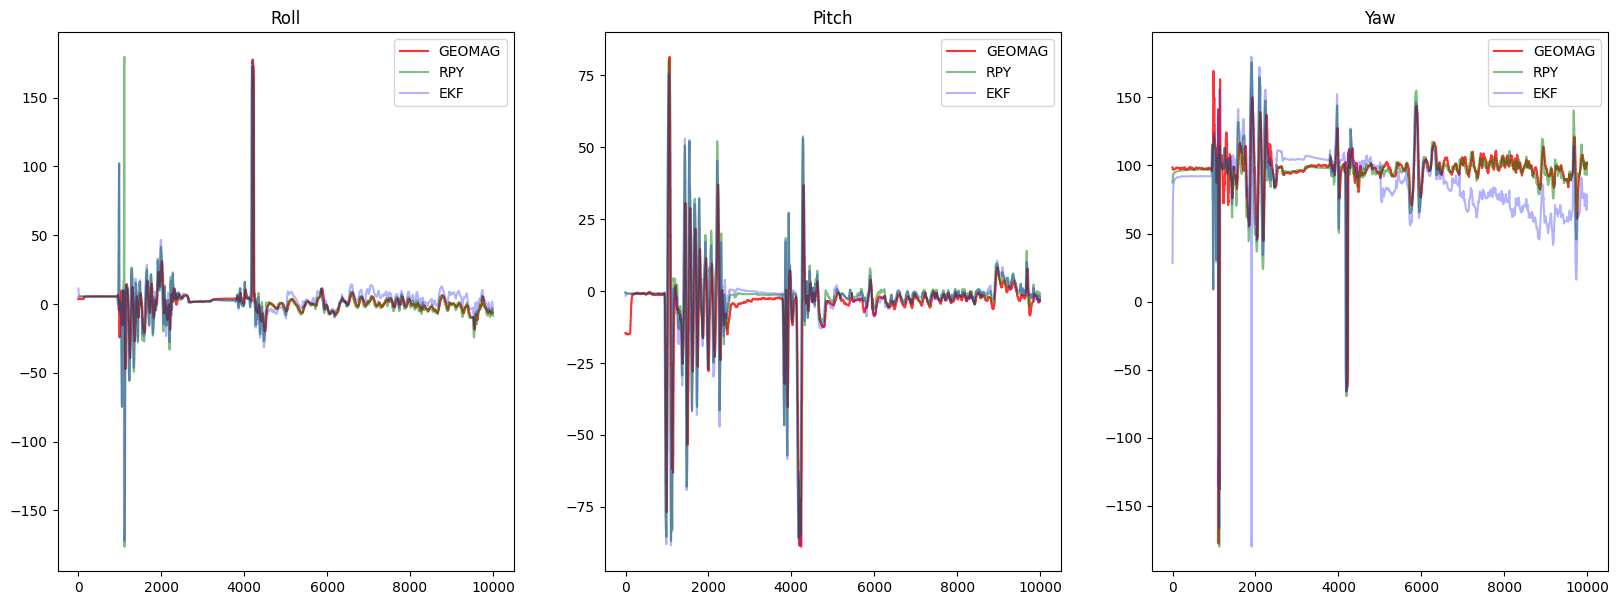

In [117]:
figure = plt.figure(figsize= (20, 7))
# plt.title("Углы между кватернионами по кратчайшей дуге")
titles = ["Roll", "Pitch", "Yaw"]
for plti in range(1, 4):
    plt.subplot(130 + plti)
    plt.title(titles[plti-1])
    plt.plot([i for i in range(mes_len)], [angles["GEOMAG"][k][plti-1] for k in range(mes_len)], alpha=0.8, color="red")
    plt.plot([i for i in range(mes_len)], [angles["RPY"][k][plti-1] for k in range(mes_len)], alpha=0.5, color="green")
    plt.plot([i for i in range(mes_len)], [angles["EKF"][k][plti-1] for k in range(mes_len)], alpha=0.3, color="blue")
    plt.legend(["GEOMAG", "RPY", "EKF"])
# plt.xlabel("index")
# plt.ylabel("degrees")
plt.show()